# 1. Datenvisualisierung mit Python

## Visualisierungstechniken

aufgeschlüsselt nach den zugrundeliegenden **Daten (WAS)** und **Zielen (WARUM)**:

https://www.data-to-viz.com

https://python-graph-gallery.com

## Visualisierungsbibliotheken

* Matplotlib
* Pandas Visualization
* Seaborn
* Plotly für interaktive Plots + Cufflinks

# Matplotlib:

* ist die bekannteste und am meisten verbreitetste Library zum Darstellen von Diagrammen und ähnlichen Visualisierungen 
* Nachbildung der Möglichkeiten in Python , die Matlab zur Visualisierung bietet

## Installation

`conda install matplotlib`
oder
`pip install matplotlib`

## Links
* https://matplotlib.org/gallery/index.html# 
* Dokumentation: https://matplotlib.org/contents.html
* Tutorials: https://matplotlib.org/tutorials/index.html

## Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline 

Sofern kein Notebook verwendet wird, sondern einen anderen Editor, sollte man `plt.show()` am Ende aller Plottingbefehle eingeben. Dadurch öffnet sich der Graph in einem neuen Fenster.

### Datenimport

In [2]:
cv19 = pd.read_csv('time-series-19-covid-combined_csv.csv')
cv19.head()

,Date,Country/Region,Province/State,Lat,Long,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
1,2020-01-23,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
2,2020-01-24,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
3,2020-01-25,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
4,2020-01-26,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0


In [3]:
germany = cv19[cv19['Country/Region']=='Germany']
germany.head()

,Date,Country/Region,Province/State,Lat,Long,Confirmed,Recovered,Deaths
13624,2020-01-22,Germany,NaN,51.0,9.0,0.0,0.0,0.0
13625,2020-01-23,Germany,NaN,51.0,9.0,0.0,0.0,0.0
13626,2020-01-24,Germany,NaN,51.0,9.0,0.0,0.0,0.0
13627,2020-01-25,Germany,NaN,51.0,9.0,0.0,0.0,0.0
13628,2020-01-26,Germany,NaN,51.0,9.0,0.0,0.0,0.0


### plt.plot()

https://matplotlib.org/faq/usage_faq.html

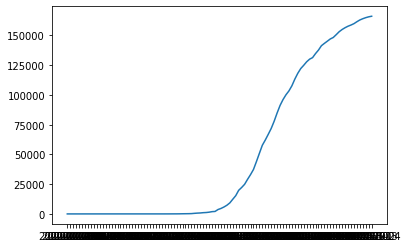

In [6]:
# Liniendiagramm - pl.plot(x,y)
plt.plot(germany['Date'],germany['Confirmed']) # Confirmed Cases
plt.show()

Text(0.5, 1.0, 'Corona Cases in Germany')

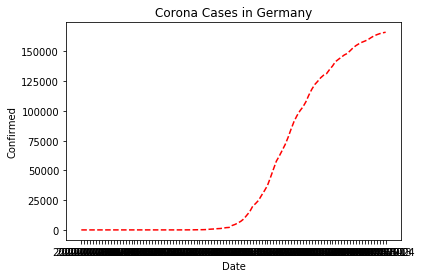

In [10]:
plt.plot(germany['Date'],germany['Confirmed'],"r--") #Farbe r=red, Linientyp --
plt.xlabel("Date") # Beschriftung x-Achse
plt.ylabel("Confirmed") # Beschriftung y-Achse
plt.title("Corona Cases in Germany") # Plot Title

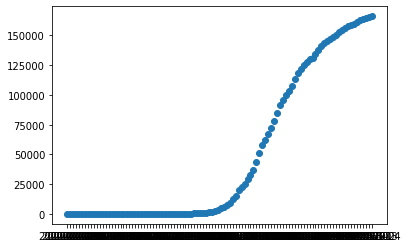

In [11]:
# Scatterplot

plt.scatter(germany['Date'],germany['Confirmed'])

### Objektorientierte Methode

Diagramm-Objekte werden instanziiert und darauf Methoden oder Attribute angewandt. Dieser Ansatz ist leichter, wenn man mit Arbeitsflächen arbeitet, auf denen mehrere Diagramme sind.

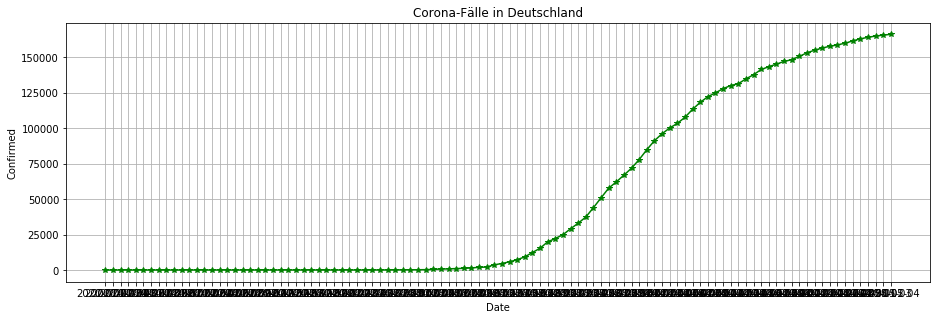

In [14]:
#leere Arbeitsfläche erstellen
af = plt.figure()
#Achsen hinzufügen
axes = af.add_axes([0.1,0.1,2.0,0.9]) #Position x,y, Höhe, Länge
axes.plot(germany['Date'],germany['Confirmed'],"g*-") # Farbe grün, Linientyp *-
axes.set_xlabel("Date")
axes.set_ylabel("Confirmed")
axes.set_title("Corona-Fälle in Deutschland")

# Ein gepunktetes Diagramm-Gitter einblenden:
plt.grid(True)

Text(0.5, 1.0, 'Recovered Cases')

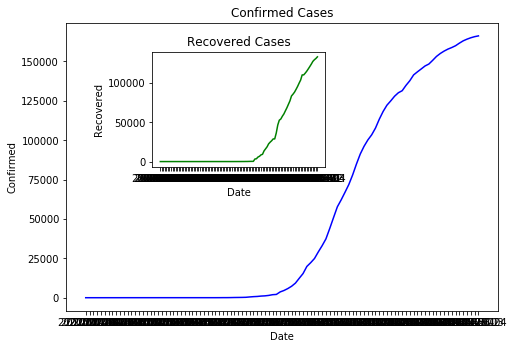

In [20]:
#Vorteil der objektorientierten Methode: man kann mehr als eine Achse zur Visuallsierung hinzufügen

af = plt.figure()
axes1 = af.add_axes([0.1,0.1,1.0,1.0])
axes2 = af.add_axes([0.3,0.6,0.4,0.4])

axes1.plot(germany['Date'], germany['Confirmed'],"b")
axes1.set_xlabel("Date")
axes1.set_ylabel("Confirmed")
axes1.set_title("Confirmed Cases")

axes2.plot(germany['Date'],germany['Recovered'],"g")
axes2.set_xlabel("Date")
axes2.set_ylabel("Recovered")
axes2.set_title("Recovered Cases")

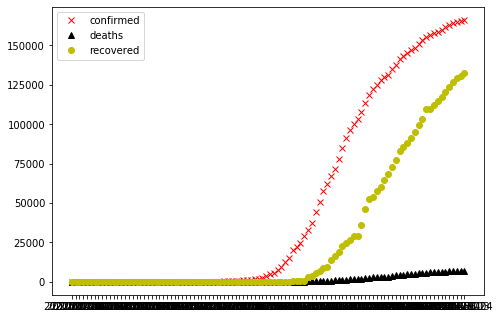

In [25]:
#Mehrere Datenreihen in einem Plot für eine bessere Vergleichbarkeit

diag = plt.figure()
ax = diag.add_axes([0,0,1,1])
ax.plot(germany['Date'],germany['Confirmed'], "rx", label="confirmed")
ax.plot(germany['Date'],germany['Deaths'], "k^",label="deaths")
ax.plot(germany['Date'],germany['Recovered'], "yo", label="recovered")

# Viele Optionen für die Legende
ax.legend(loc=2) # Ecke oben rechts
#ax.legend(loc=1) # Ecke oben links
#ax.legend(loc=3) # Ecke unten links 
#ax.legend(loc=4) # Ecke unten rechts

Weitere Anpassungsmöglichkeiten:

* Mit plt.axis( [xmin,xmax,ymin,ymax] ) kann der Wertebereich der Achsen manuell festgelegt werden.
* Mit plt.grid(True) wird ein zur Achsen-Skalierung passendes Gitter als Diagramm-Hintergrund eingezeichnet.
* Mit plt.xscale('log') wird die x-Achse logarithmisch skaliert.
* Mit plt.yscale('log') wird entsprechend die y-Achse logarithmisch skaliert.
* Mit plt.xlabel('Text') kann die x-Achse des Diagramms beschriftet werden.
* Mit plt.ylabel('Text') wird entsprechend die y-Achse beschriftet.
* Mit plt.title('Text') kann eine Überschrift über das Diagramm drucken.
* Mit "Ticks" (Bezugspunkte) für x-Achse festlegen: #plt.xticks(..)

**Farben:** b - blue, c - cyan, g - green, m - magenta, r - red, y - yellow, k - black, w - white

**Linien** - (Durchgezogene Linie), --	(Gestrichelte Linie), -. (Abwechselnd gestrichelte und gepunktete Linie),
: (Gepunktete Linie), o	(Einzelne Punkte, Darstellung als farbige Kreise), s (Einzelne Punkte, Darstellung als farbige Rechtecke), D (Einzelne Punkte, Darstellung als Diamant-Form), ^	(Einzelne Punkte, Darstellung als farbige Dreiecke), x (Einzelne Punkte, Darstellung als farbige x-Zeichen), *	(Einzelne Punkte, Darstellung als farbige *-Zeichen), + (Einzelne Punkte, Darstellung als farbige +-Zeichen)

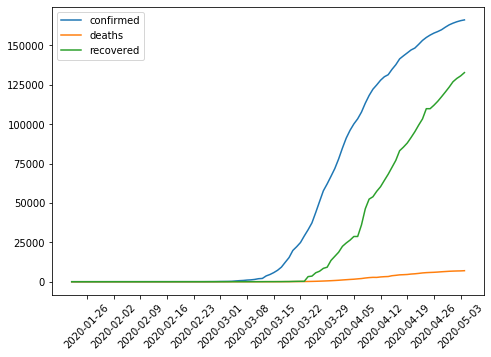

In [29]:
diag = plt.figure()
date = germany['Date']
ax = diag.add_axes([0,0,1,1])
ax.plot(date,germany['Confirmed'], label="confirmed")
ax.plot(date,germany['Deaths'], label="deaths")
ax.plot(date,germany['Recovered'], label="recovered")
ax.legend(loc=2)

#plt.xticks( [germany['Date'].min(), germany['Date'].max()])

#Ticks für die x-Achse anpassen:
daterange = pd.date_range(start=date.min(),end=date.max(), freq='W')
daterange = [pd.to_datetime(date,format='%Y-%m-%d').strftime('%Y-%m-%d') for date in daterange]
plt.xticks(daterange, rotation=45)
#plt.xticks(rotation=90)
plt.show()

## Plot speichern

In [30]:
diag.savefig("plot_germany.png", dpi=200) #auch ohne dpi möglich
#diag.savefig("dateiname.eps", dpi=200)

# Visualisierungen in Pandas

* basiert auf Matplotlib (d.h. in Matplotlib geht auch alles, was mit Pandas möglich ist)
* ist direkt in Pandas verfügbar ohne Matplotlib installieren zu müssen

Link: https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

## Diagrammarten
Es gibt verschiedene eingebaute Visualisierungen in Pandas. Die meisten davon sind statistische Diagramme. Hier eine Übersicht:
* df.plot.area
* df.plot.barh
* df.plot.density
* df.plot.hist
* df.plot.line
* df.plot.scatter
* df.plot.bar
* df.plot.box
* df.plot.hexbin
* df.plot.kde
* df.plot.pie

Alternativ auch df.plot(kind="area") möglich.

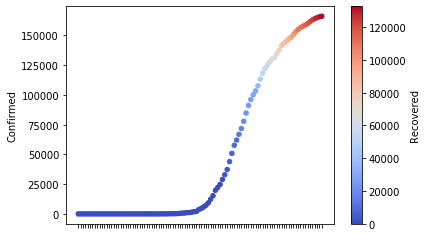

In [32]:
#germany.plot.scatter(x='Date',y='Confirmed')
germany.plot.scatter(x='Date',y='Confirmed', c='Recovered',cmap='coolwarm')

Nutzung von `s`, um die Größe (en. scale) der Punkte zu ändern. Der `s` Parameter muss ein Array sein.

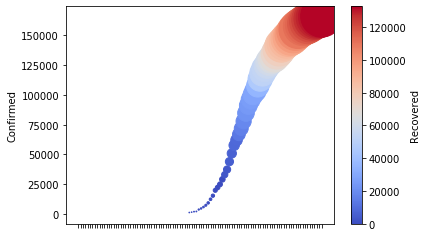

In [34]:
germany.plot.scatter(x='Date',y='Confirmed', s=germany['Deaths']/4, c='Recovered',cmap='coolwarm')

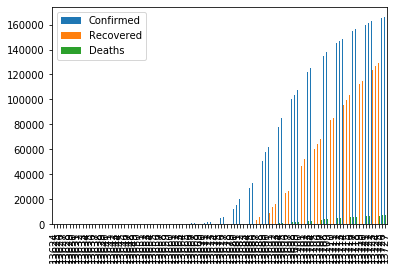

In [37]:
germany[['Confirmed', 'Recovered', 'Deaths']].plot.bar()